In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'Data\household_power_consumption.txt', sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [75]:
daily_df = df.resample('D').sum()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(d_set):
    dftest = adfuller(d_set, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','* Lags','* Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print(">>> Series is Stationary\n")
    else:
        print(">>> Series is Non-Stationary\n")
      

def get_stationarity(data):
    """"checks that columns that are stationary."""
    for i in data.columns:
        print('--------------------------')
        print(f'{i} Column')
        print('--------------------------')
        adf_test(data[i])

In [ ]:
get_stationarity(daily_df)

--------------------------
Global_active_power Column
--------------------------
Test Statistic            -3.731704
p-value                    0.003689
* Lags                    22.000000
* Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64
>>> Series is Stationary

--------------------------
Global_reactive_power Column
--------------------------
Test Statistic            -3.825851
p-value                    0.002654
* Lags                    22.000000
* Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64
>>> Series is Stationary

--------------------------
Voltage Column
--------------------------
Test Statistic            -2.959237
p-value                    0.038881
* Lags                    23.000000
* Observations          1418.000000
Critical Value (1%)       -3.434970
C

In [ ]:
rolling_mean = daily_df.rolling(window = 365).mean()
rolling_std = daily_df.rolling(window = 365).std()

Text(0, 0.5, 'Sub metering 1')

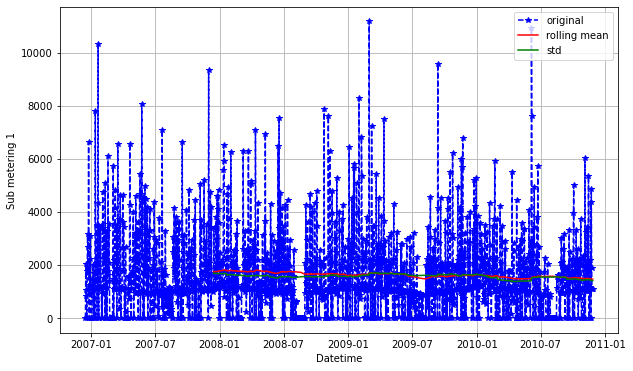

In [ ]:
# SUB METERING 1 OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Sub_metering_1,'--', marker='*', color = 'blue',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_1, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_1, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 1')


Text(0, 0.5, 'Global active power')

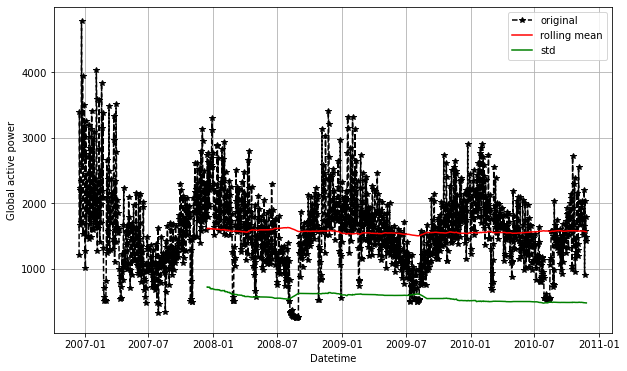

In [ ]:
# GLOBAL ACTIVE POWER OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_active_power,'--', marker='*', color = 'black',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_active_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_active_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global active power')

Text(0, 0.5, 'Global Reactive Power')

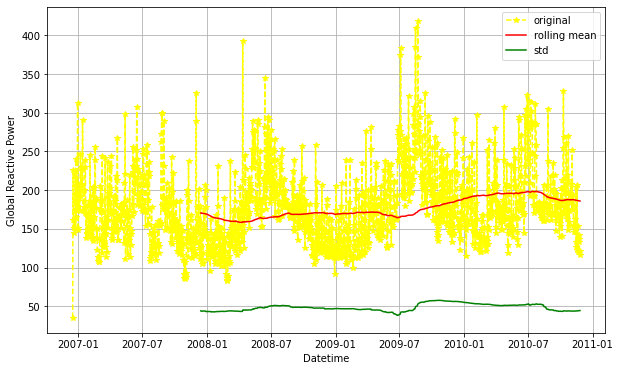

In [ ]:
# GLOBAL_REACTIVE_POWER
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_reactive_power,'--', marker='*', color = 'yellow',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_reactive_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_reactive_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global Reactive Power')

Text(0, 0.5, 'Sub metering 2')

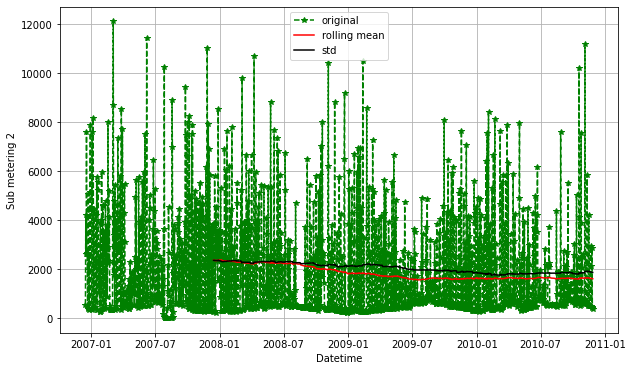

In [ ]:
# SUB METERING 2
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Sub_metering_2,'--', marker='*', color = 'green',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_2, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_2, color = 'black', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 2')

Text(0, 0.5, 'Global_intensity')

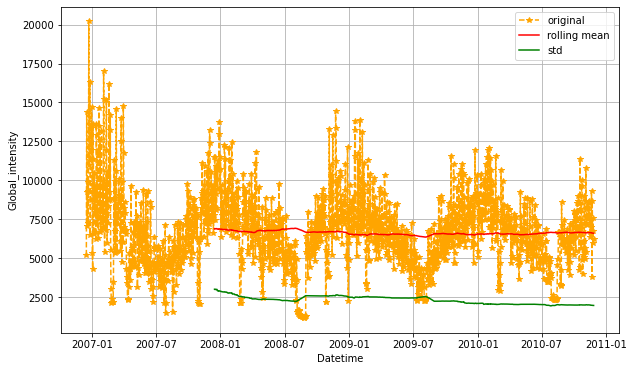

In [ ]:
# GLOBAL INTENSITY
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_intensity,'--', marker='*', color = 'orange',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_intensity, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_intensity, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global_intensity')

Text(0, 0.5, 'global active power')

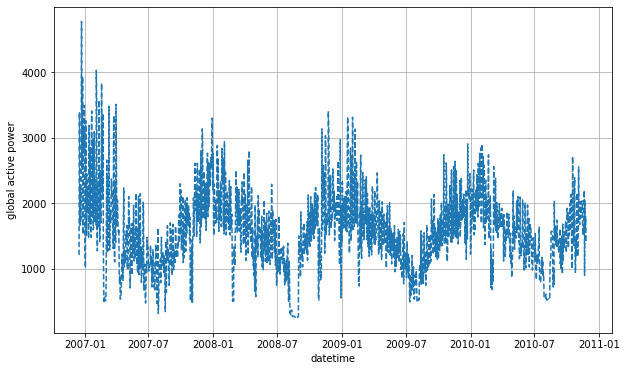

In [76]:
# GLOBAL ACTIVE POWER ON DAILY TIME FRAME 
plt.figure(figsize=(10,6))
plt.plot(daily_df.index, daily_df.Global_active_power,'--')
plt.grid()
plt.xlabel('datetime')
plt.ylabel('global active power')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df2['Global_active_power'],df2['Global_reactive_power'])

(0.24701705264406354, 0.0)

In [ ]:
pearsonr(df2['Voltage'],df2['Global_intensity'])

(-0.41136307176847053, 0.0)

In [ ]:
daily_df.reset_index(inplace=True)
prophet_daily = daily_df[['datetime','Global_active_power']]

In [ ]:
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [ ]:
train_set = prophet_daily.iloc[:1077,:]
test_set = prophet_daily.iloc[1077:,:]
print(train_set.shape)
print(test_set.shape)

(1077, 2)
(365, 2)


In [ ]:
# Fitting the model to the dataset
from fbprophet import Prophet

p_model = Prophet()
p_model.fit(train_set)
pred = p_model.predict(test_set)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Model for calculation of MAPE
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [ ]:
mape = Metric(test_set['y'],pred['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is:{round(mape,1)}')

the Mean Average Percentage Error ( MAPE) is:20.9


In [ ]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,1)))

The Root Mean Square Error(rmse) value is : 375.0


Figure(648x648)


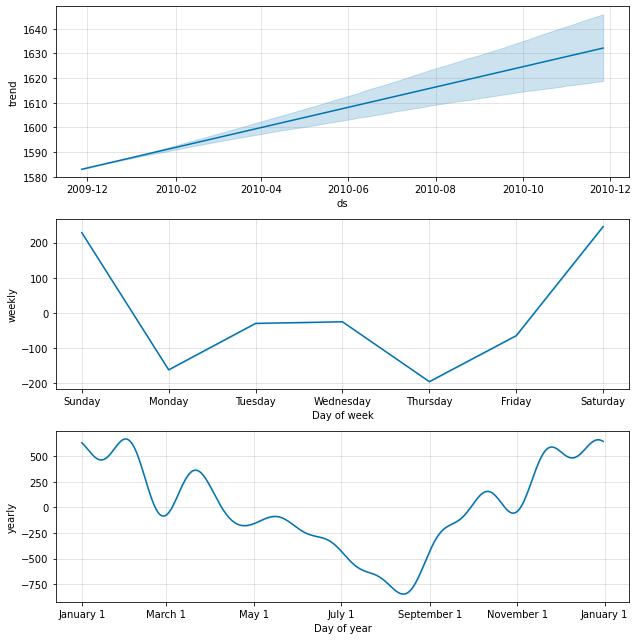

In [ ]:
print(p_model.plot_components(pred))

In [ ]:
daily_df.reset_index(inplace = True)
multi_prophet = daily_df
print(multi_prophet.shape)
multi_prophet.head()

(1442, 9)


,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
multi_prophet = multi_prophet.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [ ]:
train_set_multi = multi_prophet.iloc[:1077,:]
test_set_multi = multi_prophet.iloc[1077:,:]
print(train_set_multi.shape)
print(test_set_multi.shape)

(1077, 9)
(365, 9)


In [ ]:
# Creating the prophet multivariate model
m_model = Prophet()
m_model.add_regressor('add1')
m_model.add_regressor('add2')
m_model.add_regressor('add3')
m_model.add_regressor('add4')
m_model.add_regressor('add5')
m_model.add_regressor('add6')

In [ ]:
m_model.fit(train_set_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m_pred = m_model.predict(test_set_multi)

In [ ]:
# Calculating the MAPE using the previously defined function
mape = Metric(test_set_multi['y'],m_pred['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) Is: {round(mape,2)}')

The Mean Average Percentage Error ( MAPE) Is:2.54


In [ ]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set_multi['y']),np.array(m_pred['yhat'])))
print('The Root Mean Square Error(rmse) Value Is : {}'.format(round(rmse,2)))

The Root Mean Square Error(rmse) Value Is : 38.03


Figure(648x864)


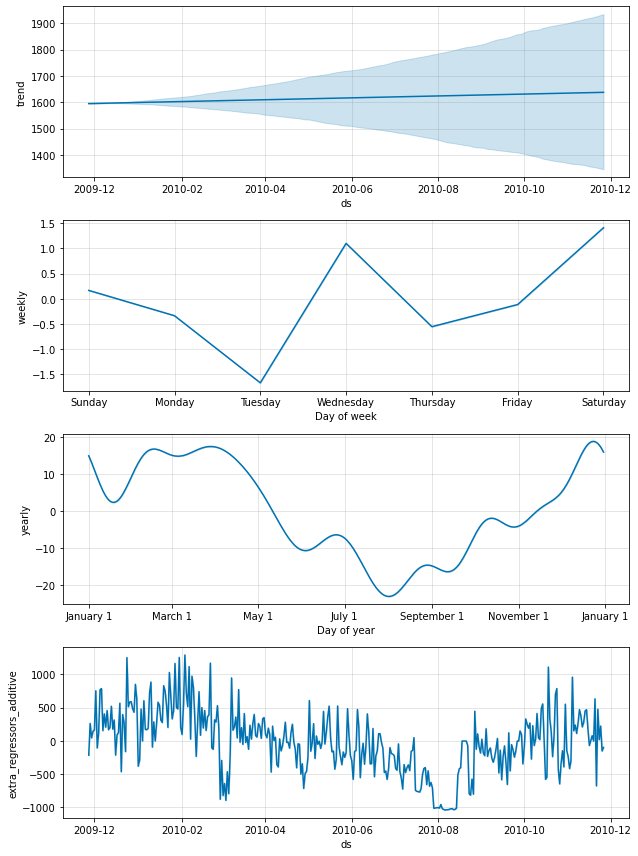

In [ ]:
print(m_model.plot_components(m_pred))